In [1]:
import sys
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [2]:
def dichotomy(a, b, delta):
    f_left, f_right = f(a), f(b)
    if not f_left * f_right < 0:
        print('check the bounds in dichotomy method')
        return None
    solution = [b] # ищем корень с округлением в сторону 1 (только правые приближения)
    left, right = a, b
    while (right - left > delta):
        mid = (right + left) / 2
        f_mid = f(mid)
        if f_mid == 0:
            solution += [mid]
            return solution
        if f_left * f_mid < 0:
            right, f_right = mid, f_mid
            solution += [right]
        else:
            left, f_left = mid, f_mid
            solution += [right]
    return solution

In [3]:
def simple_iterations(x0, delta, max_iter, l):
    foo = lambda x: phi(x, l)
    x1 = x0
    x2 = foo(x1)
    x3 = foo(x2)
    solution = [x1, x2, x3]
    for n in range(max_iter):
        if (x3 - x2) ** 2 / abs(2 * x2 - x3 - x1) < delta: # оценка точности по трем последним вычислениям
            return solution
        x1, x2 = x2, x3
        x3 = foo(x3)
        solution += [x3]
    print('max number of iterations encountered in simple iterations method')
    return None

In [4]:
def newton(x0, delta, max_iter):
    solution, x_n = [x0], x0
    for n in range(max_iter):
        f_x_n = f(x_n)
        if abs(f_x_n) < delta:
            return solution
        Df_x_n = Df(x_n, epsilon)
        if Df_x_n == 0:
            print('zero derivative in newton method')
            return None
        x_n = x_n - f_x_n / Df_x_n
        solution += [x_n]
    print('max number of iterations encountered in newton method')
    return None

In [5]:
def Df(x, delta): # центральная производная
    return (f(x + delta) - f(x - delta)) / (2 * delta)

In [6]:
f = lambda x: 1 / np.tan(np.sqrt(k * (1 - x))) - np.sqrt(1 / x - 1)
phi = lambda x, l: x - l * f(x) # функция для метода простых итераций

-----

In [44]:
epsilon = 1.e-6 # 
k = 45    #2 * m * a ** 2 * U0 / h_bar ** 2
a, b = max(1. - np.pi ** 2 / k + np.finfo(float).eps, np.finfo(float).eps), 1. - np.finfo(float).eps

-----

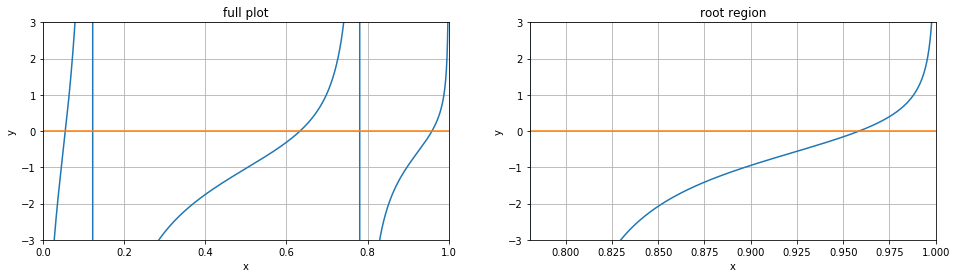

In [45]:
x = np.linspace(0. + epsilon, 1. - epsilon, 10000)
y = [f(s) for s in x]

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.plot([0., 1.], [0., 0.])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0., 1.])
plt.ylim([-3., 3.])
plt.title('full plot')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.plot([0., 1.], [0., 0.])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([a, b])
plt.ylim([-3., 3.])
plt.title('root region')
plt.grid()

plt.show()

In [46]:
MAX = 1000

precision = [10 ** (-i) for i in range(1, 15)]
iters = []
roots = []

approx = 0.925

for p in precision:
    dich, simp, newt = dichotomy(a, b, p), simple_iterations(approx, p, MAX, 1 / Df(approx, epsilon)), newton(approx, p, MAX)
    iters += [[len(dich), len(simp), len(newt)]]
    roots += [[dich[-1], simp[-1], newt[-1]]]
iters = np.array(iters).transpose()

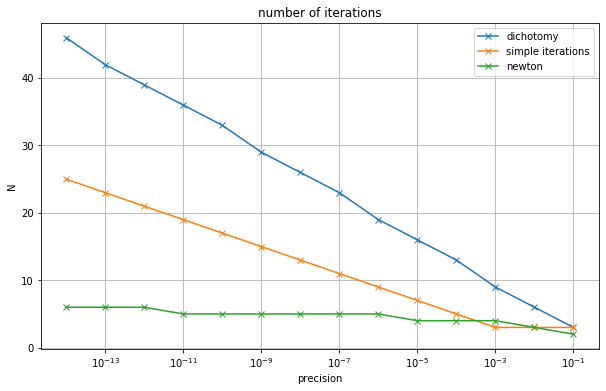

In [47]:
plt.figure(figsize=(10, 6))

plt.subplot()
plt.plot(precision, iters[0], 'x-', label='dichotomy')
plt.plot(precision, iters[1], 'x-', label='simple iterations')
plt.plot(precision, iters[2], 'x-', label='newton')
plt.xscale('log')
plt.xlabel('precision')
plt.ylabel('N')
plt.title('number of iterations')
plt.legend()
plt.grid()

plt.show()

In [48]:
i = 0
print('precision\t dichotomy\t\t simple iterations\t newton\n')
for r in roots:
    print(10 ** (-i - 1), '\t\t', r[0], '\t', r[1], '\t', r[2], '\n')
    i += 1

precision	 dichotomy		 simple iterations	 newton

0.1 		 0.9999999999999998 	 0.957491005446421 	 0.9616539637143376 

0.01 		 0.9588766483287943 	 0.957491005446421 	 0.9586415494923647 

0.001 		 0.9588766483287943 	 0.957491005446421 	 0.9585485678938233 

0.0001 		 0.9585553721438629 	 0.9584548277641327 	 0.9585485678938233 

1e-05 		 0.9585486788900102 	 0.9585399747516954 	 0.9585485678938233 

1e-06 		 0.9585486788900102 	 0.9585477145852939 	 0.9585484906230722 

1e-07 		 0.958548522016873 	 0.9585484198892738 	 0.9585484906230722 

1e-08 		 0.9585484958713502 	 0.9585484841757071 	 0.9585484906230722 

1e-09 		 0.9585484909690646 	 0.9585484900353519 	 0.9585484906230722 

1e-10 		 0.9585484906626718 	 0.9585484905694537 	 0.9585484906230722 

1e-11 		 0.9585484906243726 	 0.9585484906181367 	 0.9585484906230722 

1e-12 		 0.9585484906235747 	 0.9585484906225741 	 0.9585484906230192 

1e-13 		 0.9585484906230761 	 0.9585484906229785 	 0.9585484906230192 

1e-14 		 0.958548490